<a href="https://colab.research.google.com/github/steve-barnard/ML-pymath-tutorial/blob/master/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = {
"house_size": [1,3,3.5,5,5.5,6.5,8],
"house_price": [2.5,3,4.5,5,6,6,7]
}

In [46]:
data = {
"house_size": [1,2,4,5,7],
"house_price": [2,3,7,5,11]
}

In [47]:
df = pd.DataFrame(data)

In [48]:
df

,house_size,house_price
0,1,2
1,2,3
2,4,7
3,5,5
4,7,11


<Axes: xlabel='house_size', ylabel='house_price'>

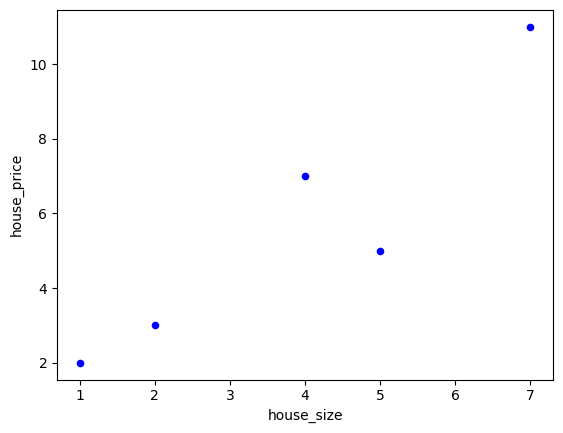

In [49]:
df.plot(x='house_size', y='house_price', kind='scatter', marker='o', linestyle='-', color='b')

In [69]:
class LinearRegression():
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def fit(self):
    X = self.X
    y = self.y
    n = len(X) # number of observations
    s1 = sum(X) # sum of X
    s2 = sum([x**2 for x in X]) # sum of X squared
    cxy = sum([ i * j for i,j in list(zip(X,y))]) #sum of x * y
    cy = sum(y) # sum of y
    m = ((n * cxy) - (s1 * cy)) / ((n * s2) - (s1 * s1)) # slope
    b = ((s2 * cy) - (s1 * cxy)) / ((n * s2) - (s1 * s1)) # intercept

    preds = []

    for i in X:
      preds.append((i, (m * i) + b))

    return (s1, s2, cxy, cy, m,b, preds)

In [70]:
model = LinearRegression(X = df['house_size'], y = df['house_price'])

In [71]:
model.fit()

(19,
 95,
 138,
 28,
 1.3859649122807018,
 0.3333333333333333,
 [(1, 1.719298245614035),
  (2, 3.105263157894737),
  (4, 5.87719298245614),
  (5, 7.2631578947368425),
  (7, 10.035087719298247)])

In [72]:
preds = model.fit()[6]

In [73]:
preds

[(1, 1.719298245614035),
 (2, 3.105263157894737),
 (4, 5.87719298245614),
 (5, 7.2631578947368425),
 (7, 10.035087719298247)]

In [74]:
df['preds'] = [i[1] for i in preds]

In [75]:
import matplotlib.pyplot as plt

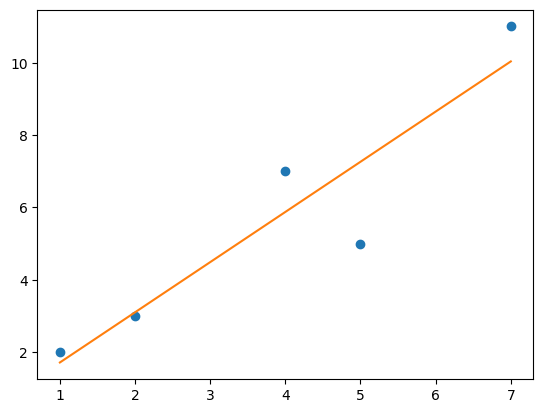

In [78]:
plt.plot(df['house_size'], df['house_price'], marker='o', linestyle='', label='Series 1')
plt.plot(df['house_size'], df['preds'], marker='', linestyle='-', label='Series 2')
plt.show()